# Con-census: Climate Risk Assessment 

#### Safeguarding the world from disasters birthed by Mother Nature!!!!
---

#### Project by Larry Holmes, Qinzhi Chen, & Everett Chen | Codeup | Levitt Cohort | Nov 2022

#### The findings of this project are available in presentation format by clicking on the [Final Slide Presentation](https://www.canva.com/design/DAFQzsa56RQ/aH-9CfaLQudE1HMc7TYoGQ/view?utm_content=DAFQzsa56RQ&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink).

<img src="hurricane.jpeg">

## Project Goal

blurb

## Project Description

blurb

# Executive Summary
- The South region has most diversed cost versus pop_density
- The South region has, as the author Cindy Ermus wrote in her book,"The Gulf South, and the Gulf Coast in particular, is bound together by much more than geography or the shared experience of risk and vulnerability to wind, water, erosion, and biological exchanges,” she writes. “More fundamentally, the environment has helped define the region’s identity and largely determined its history, its social fabric, and its economy.” We can assumed, based on this graph that south region has significant high risk compare to other regions.
- The New York and California have the highest support_level. A seperated studies are recommended
- Climate change should be our national top concern, and higher amount of funding should be allocated.
- The KNN is our best model and we use it in out final test. The KNN model achived 90% accuracy

In [98]:
# import os and csv functions
import os
import csv
# import libaries
import pandas as pd
import numpy as np
from tabulate import tabulate
from datetime import datetime
from sklearn.impute import SimpleImputer
from tabula import read_pdf
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# utilized for creating models and visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# utilized for metrics on my models
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Homemade module
import prepare
# explore.py
import modeling

# Wrangle

In [99]:
# getting the file from local
df=prepare.get_fema_data()

In [100]:
# wrangle df
df=prepare.prep_fema(df)

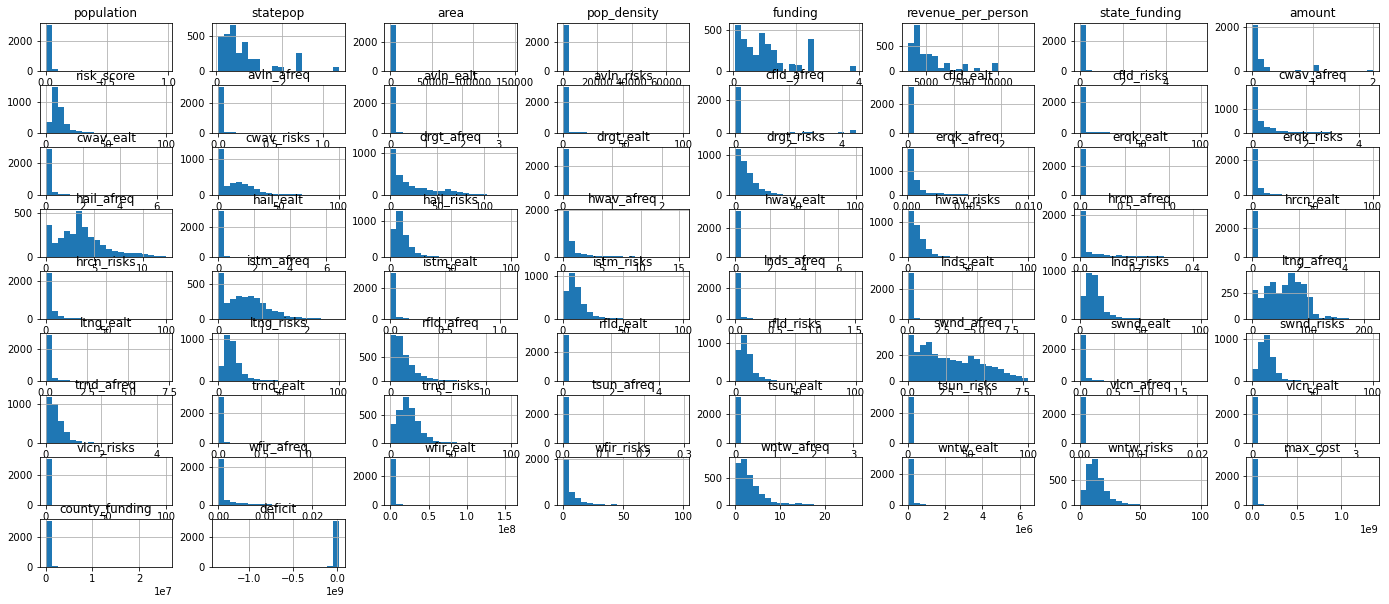

In [101]:
# check distribution
df.hist(figsize=(24, 10), bins=20)
plt.show()

- The majority of the distribution graphs are left skewed.
- The distribution graphs showing a lot outliers in this data. We decided not remove any outliers due to we would like all inclusive data for all states and counties.

In [103]:
df.head()

,full_state,state,county,population,statepop,area,pop_density,funding,revenue_per_person,state_funding,...,wfir_afreq,wfir_ealt,wfir_risks,wntw_afreq,wntw_ealt,wntw_risks,max_cost,county_funding,deficit,support_level
0,Alabama,AL,Autauga,54571,4779736,594.448312,91.801085,54697779694,8448,461015808,...,0.000311,2.136099e+03,1.488876,0.576606,5994.428320,4.903196,1.487032e+06,71524.017889,-1.415508e+06,top tier
1,Alabama,AL,Baldwin,182265,4779736,1589.815853,114.645353,54697779694,8448,1539774720,...,0.001520,1.195504e+06,16.501350,0.214639,43079.729915,12.725419,2.915651e+06,238887.414937,-2.676764e+06,top tier
2,Alabama,AL,Barbour,27457,4779736,885.001636,31.024801,54697779694,8448,231956736,...,0.000329,1.638065e+03,1.999050,0.247117,8241.807446,7.997717,1.634837e+06,35986.787106,-1.598850e+06,top tier
3,Alabama,AL,Bibb,22915,4779736,622.460425,36.813585,54697779694,8448,193585920,...,0.000493,3.809844e+03,1.607851,0.906096,4437.875378,3.949848,1.253614e+06,30033.770133,-1.223580e+06,top tier
4,Alabama,AL,Blount,57322,4779736,644.821022,88.895985,54697779694,8448,484256256,...,0.000429,2.837412e+03,1.957753,1.070840,10862.665137,7.150578,3.537584e+06,75129.643097,-3.462455e+06,top tier


In [7]:
# split df into test (20%) and train_validate (80%)
tv_df, test = train_test_split(df, test_size=0.2, random_state=123)
# split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
train, validate = train_test_split(tv_df, test_size=0.3, random_state=123)

# Wrangle Key Takeaway
- The data has 3142 rows, and 26 columns. This project specifically focusing on the Severe Storm, Draught and Hurricane.
- The project has included all 50 states' counties and the District of Columbia area. The risk score is retrived it from Federal Emergency Management Agency (FEMA). In our analysis we used three disasters: Drought, Severe Storm, and Hurricane.
- Next, we will explore the data and set our target variable==support level

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   full_state          3142 non-null   object  
 1   state               3142 non-null   object  
 2   county              3142 non-null   object  
 3   population          3142 non-null   int64   
 4   statepop            3142 non-null   int64   
 5   area                3142 non-null   float64 
 6   pop_density         3142 non-null   float64 
 7   funding             3142 non-null   int64   
 8   revenue_per_person  3142 non-null   int64   
 9   state_funding       3142 non-null   int64   
 10  amount              3142 non-null   int64   
 11  risk_score          3142 non-null   float64 
 12  avln_afreq          3142 non-null   float64 
 13  avln_ealt           3142 non-null   float64 
 14  avln_risks          3142 non-null   float64 
 15  cfld_afreq          3142 non-null   fl

# Exploration

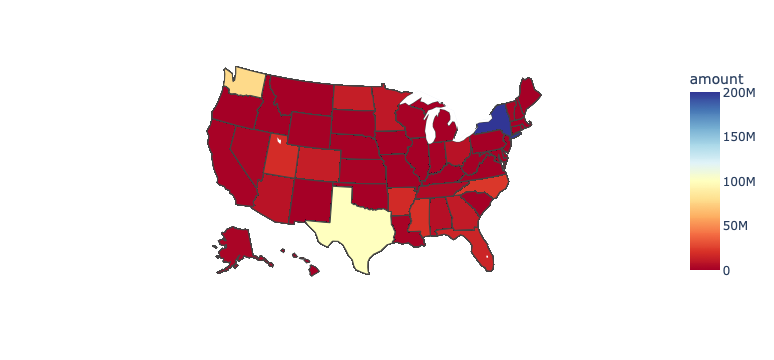

In [106]:
# lets make a map before out exploration
fig = px.choropleth(df,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='amount',
                    color_continuous_scale="rdylbu", 
                    
                    )
fig.show()

- The disaster cost for each state, we can see that the New York has the highest cost amount all other states

### Takeaway
- The science.org research believes that the california will face the mega-flood in near future as climate change worsen
    - 'Recent evidence suggests that increases in western United States flood risk caused by anthropogenic warming may have been counteracted in recent decades by natural variability, but that further warming and shifts in natural variability will eventually “unmask” this accumulated increase in regional flood risk (51). Additional work suggests that the response of flood risk to climate change is likely to exhibit threshold behavior, at least in certain climatological and hydrological regimes (52), with a precipitation extremeness threshold dictating whether flood risk decreases (for smaller events, due to the antecedent soil aridification effect of warming temperatures) or increases (for the largest events, due to the overwhelming effect of large increases in precipitation intensity). Both of these considerations are especially germane to California' [science.org](https://www.science.org/doi/10.1126/sciadv.abq0995)
- The columbia study and New York Times journalist argued that the New York is not adequately prepared for the next storm like Hurricane Sandy.
    - 'The barrier debate comes as New York City is still struggling to respond to Sandy, and the larger need to carefully reshape an entire region’s infrastructure to adapt to climate change. In the more than seven years since the storm killed 72 people and caused 62 billion in damage, agencies have spent just 54 percent of the 14.7 billion allocated by the federal government to help the city recover and prepare for new storms.' [columbia.edu](https://news.climate.columbia.edu/2020/01/21/politics-cost-adapting-climate-change-new-york-city/)

### Q1: Whether the dense of the population contributed to the overall funding available or the risk level

- If we can determine whether the risk is associated with funding or the population dense is associated with the funding we can find out how to determine the level of prepareness. 
- If the risk is associated with the funding, which means the higher the risk, the higher the funding. Then we can further explore risk level based on the counties.
- If the population is assoiciated with the funding, then we can use the population growth to assist us to build a prediction model for predicting the the county's prepareness.

In [20]:
# set up th eenvironment
q1=tv_df.groupby('state',as_index=False).agg(sum)
q1.head()

,state,population,statepop,area,pop_density,funding,revenue_per_person,state_funding,amount,risk_score,...,vlcn_risks,wfir_afreq,wfir_ealt,wfir_risks,wntw_afreq,wntw_ealt,wntw_risks,max_cost,county_funding,deficit
0,AK,667706,16335313,396555.713086,221.428238,313205776212,147660,4286672520,46000000,141.652832,...,187.335541,0.000000,0.000000e+00,0.000000,117.883987,3.720911e+05,226.361899,1.169158e+08,1.880250e+06,-1.150355e+08
1,AL,4590704,296343632,47201.832935,5754.173487,3391262341028,523776,38782267392,388405696,687.128140,...,0.000000,0.025194,4.428943e+06,200.525646,51.498918,1.910002e+06,637.990872,3.306246e+08,6.016851e+06,-3.246078e+08
2,AR,2447582,183702834,44050.424616,3441.775056,1850835335454,323253,12558543242,1106908992,825.370732,...,0.000000,0.033184,1.817987e+06,219.899029,109.555189,1.026884e+07,1204.170081,1.929571e+08,1.474801e+07,-1.782091e+08
3,AZ,2318857,70312187,88001.668434,307.788916,1067003742321,79915,16846496105,88000000,280.609547,...,0.000000,0.048426,8.588673e+07,460.468422,21.459533,5.966349e+05,195.753769,1.637310e+08,2.902191e+06,-1.608288e+08
4,CA,19686578,1601920108,120731.915636,32034.798412,16804912003279,246476,112843465096,43000000,1151.969166,...,374.108564,0.246089,4.101657e+08,1220.167837,209.404255,5.496706e+05,260.547732,3.001695e+09,5.284426e+05,-3.001166e+09


In [25]:
# bin the risk level to identify whether the higher the risk the higher the funding
# bin the pop_lelver to identify whether the higher the population the higher the funding
q1['risk_bin'] = pd.qcut(q1.risk_score, 4, labels=['low', 'median', 'hight', 'extremely_high'])
q1['pop_bin'] = pd.qcut(q1.pop_density, 4, labels=['low', 'median', 'hight', 'extremely_high'])

<AxesSubplot:xlabel='pop_bin', ylabel='amount'>

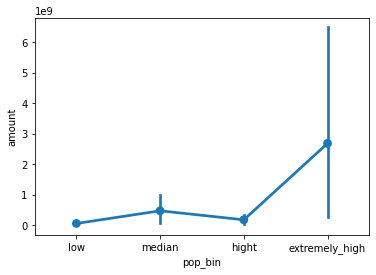

In [110]:
# use pointplot to determine the population compared to state funding
sns.pointplot(data=q1, x="pop_bin", y="amount", dodge=True)

<AxesSubplot:xlabel='risk_bin', ylabel='amount'>

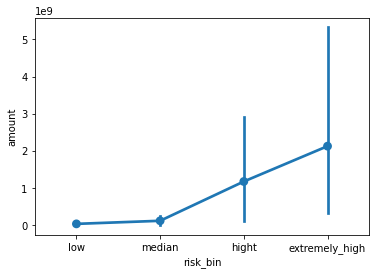

In [109]:
# use catplot
sns.pointplot(data=q1, x="risk_bin", y="amount", dodge=True)

- Those two graphs show that both risk and population influencing the level of the funding
- we can assumed that as population increase, the risk will increase, and the funding will increase
- we will going to test this hypothesis in next graph

<AxesSubplot:xlabel='pop_bin', ylabel='risk_score'>

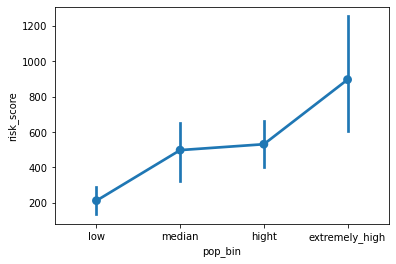

In [40]:
sns.pointplot(data=q1, x="pop_bin", y="risk_score", dodge=True)

Hypothesis:
H0=There is no linear correlation between the funding,risk and population.

Ha=There is a linear relationship between the funding, risk, and population.

In [151]:
# find out the correlation between each one
xyz = pd.DataFrame({'pop_density': q1.pop_density, 'risk_score': q1.risk_score, 'amount': q1.amount})
xyz.corr()

,pop_density,risk_score,amount
pop_density,1.000000,0.184518,0.397915
risk_score,0.184518,1.000000,0.669874
amount,0.397915,0.669874,1.000000


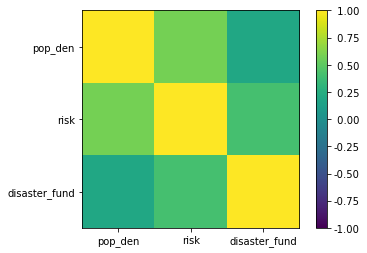

In [152]:
# depicted in graph
import scipy.stats
corr_matrix, p_matrix = scipy.stats.spearmanr(xyz, axis=0)
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('pop_den', 'risk', 'disaster_fund'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('pop_den', 'risk', 'disaster_fund'))
ax.set_ylim(2.5, -0.5)
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

- Based on the above graph we can conclude that the risk is highly associated with disaster fund rather than the population

### q1 Key Takeaway
- As the risk level rise, the higher the funding
- The extremely high risk has highest funding
- All three of them are having positive correlated to each other as the risk of the disaster increase and the pop_den increase and the state_funding increase
- It is worth to further explore which region it is belong to and what kind of the disaster contributed to increased funding. Because the region can gives us a purpose to determine whether it is due to the civilianzation behavior--located near coastal area
- if the majority of the high risk, state_funding, and pop_density are located near coastal area, then we can conclude that the funding for coastal area plays significant role for readiness, and further examine whether their current funding is ready for next disaster

### q2 Whether the funding able to cover the cost; if deficit is zero, then the risk will be low

- As we discovered in q1, that the higher risk, the higher the amount of funding.
- We should further explore if the funding is enought to cover the cost.
- If the funding is enought to cover the cost, then we can assume that the risk will be lower.

In [165]:
# set up the environment
q2 = tv_df.copy()
q2['risk_bin'] = pd.qcut(q2.risk_score, 4, labels=['low', 'median', 'hight', 'extremely_high'])

# create the region based on the state's location
west = ['WA','OR','CA','ID','NV','MT','WY','UT','AZ','CO','NM']
midwest = ['ND','MN','WI','MI','SD','NE','KS','IA','MO','IL','IN','OH']
south = ['TX','OK','AR','LA','MS','TN','KY','AL','GA','FL','SC','NC','VA','WV','MD','DE','DC']
northeast = ['PA','NJ','NY','CT','MA','RI','VT','NH','ME']
west_dict = {i:"west" for i in west}
midwest_dict = {i:"midwest" for i in midwest}
south_dict = {i:"south" for i in south}
northeast_dict = {i:"northeast" for i in northeast}
d = {**west_dict, **midwest_dict, **south_dict, **northeast_dict}
q2['Region'] = q2['state'].map(d)

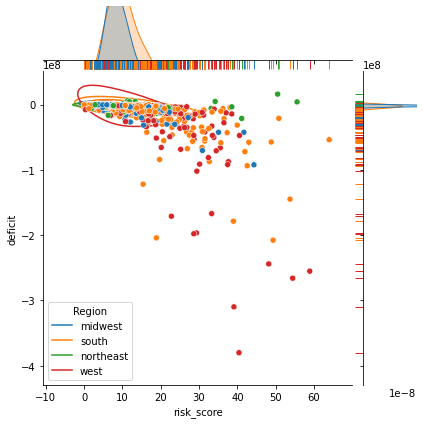

In [166]:
# use joint plot to 
g = sns.jointplot(data=q2, x="risk_score", y="deficit", hue='Region')
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
plt.show()

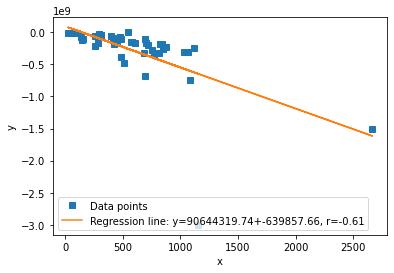

In [167]:
# Make a linear regression graph
y=q1.deficit
x=q1.risk_score
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line=f'Regression line: y={intercept:.2f}+{slope:.2f}, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

### q2 Key Takeaway
- The South region and the west region have significant amount of deficit
- The South region has as the author [Cindy Ermus wrote](https://www.theatlantic.com/technology/archive/2017/08/why-the-gulf-coast-is-uniquely-vulnerable-to-disasters-hurricane-harvey/538374/) in her book,"The Gulf South, and the Gulf Coast in particular, is bound together by much more than geography or the shared experience of risk and vulnerability to wind, water, erosion, and biological exchanges,” she writes. “More fundamentally, the environment has helped define the region’s identity and largely determined its history, its social fabric, and its economy.”
- We can assumed, based on this graph that south and west regions has significant low support level compare to other regions

### q3: Based on the q2 takeaway, we are going to make a hypothesis test that whether the south region has low support level compare to the other regions.

In [168]:
# set up the environment
q3 = tv_df.copy()

In [169]:
# create the region based on the state's location
west = ['WA','OR','CA','ID','NV','MT','WY','UT','AZ','CO','NM']
midwest = ['ND','MN','WI','MI','SD','NE','KS','IA','MO','IL','IN','OH']
south = ['TX','OK','AR','LA','MS','TN','KY','AL','GA','FL','SC','NC','VA','WV','MD','DE','DC']
northeast = ['PA','NJ','NY','CT','MA','RI','VT','NH','ME']
west_dict = {i:"west" for i in west}
midwest_dict = {i:"midwest" for i in midwest}
south_dict = {i:"south" for i in south}
northeast_dict = {i:"northeast" for i in northeast}
d = {**west_dict, **midwest_dict, **south_dict, **northeast_dict}
q3['Region'] = q3['state'].map(d)

# Hypothesis

- H0: South Region's support level equals or less than non-south region risk score
- Ha: South Region's support level greater than non-south region risk score
- Significance Level α is already set to .05


In [174]:
# Set up the environment
south_r = q3[q3.Region == 'south'].deficit
non_south= q3[q3.Region != 'south'].deficit
west=q3[q3.Region == 'west'].deficit
midwest=q3[q3.Region == 'midwest'].deficit
northeast=q3[q3.Region == 'northeast'].deficit

In [175]:
# check variance
print(south_r.var())
print(non_south.var())

204875479144348.25
492923713261873.8


In [176]:
# put into the test
t, p = stats.ttest_ind(south_r, non_south, equal_var=False)
t, p
p<0.05

False

### We cannot reject the null value, that the sourth region's support level is same as other regions

In [177]:
stats.kruskal(south, west,northeast,midwest)

KruskalResult(statistic=54.581782190481135, pvalue=8.431975117057532e-12)

### Using Kruskal-Wallis test, non-parametric test for ANOVA, also shows us that the mean of support_level from the south is similar to the other 4 Regions.

### Q3 takeaway
- The south region's supporting level has no much difference compare to the other four regions
- The Kruskal-Wallis test also concur the result
- we then can assumed that the risk level doesn't correlate to the support level
- we can further assumed that the supporting level can play a part that determine whether the amount of the state support doesn't lower the risk of living in that area
- We can concluded, if found true of above assumption, the support level is more important to determine whether the county is safer to live in

### q4: Based on the q3 takeaway, we are going to make a hypothesis test that whether the south region has higher supporting level compare to the other regions based on their risk_level.

In [189]:
# Set up environment
q4 = tv_df.copy()
q4['risk_level'] = pd.qcut(q4.risk_score, 4, labels=['low', 'median', 'hight', 'extremely_high'])

H0: support level is independed from the risk level

In [190]:
# create observed dataframe
observed = pd.crosstab(q4.risk_level, q4.support_level)
observed

support_level,above average,top tier
risk_level,,
low,0,629
median,0,628
hight,0,628
extremely_high,1,627


In [191]:
# chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')
print('P is less than Significance Level:',p<0.05)

Observed

[[  0 629]
 [  0 628]
 [  0 628]
 [  1 627]]
---
Expected

[[2.50298448e-01 6.28749702e+02]
 [2.49900517e-01 6.27750099e+02]
 [2.49900517e-01 6.27750099e+02]
 [2.49900517e-01 6.27750099e+02]]
---

chi^2 = 3.0028
p     = 0.3911956354993552
P is less than Significance Level: False


### Q4 key takeawat
- The support level is independed on the risk score

# Exploration Key takeaway
-The south region's supporting level has no much difference compare to the other four regions
- The Kruskal-Wallis test also concur the result
- we then can assumed that the risk level doesn't correlate to the support level
- we can further assumed that the supporting level can play a part that determine whether the amount of the state support doesn't lower the risk of living in that area
- We can concluded the support level is more important to determine whether the county is safer to live in

# Modeling

In [139]:
# split the data and set up the environment for our scaling
X_train, y_train, X_validate, y_validate, X_test, y_test = modeling.train_validate_test(df, 'support_level')

KeyError: "['drought_loss', 'hurricane_loss', 'storm_loss', 'support_value'] not found in axis"

In [131]:
# scale the data for the modeling
X_train_scaled, X_validate_scaled, X_test_scaled = modeling.scale_data(X_train, X_validate, X_test)

NameError: name 'X_train' is not defined

In [132]:
# find out the baseline for the model
(y_train == 'bottom tier').mean()

NameError: name 'y_train' is not defined

In [133]:
# Setting up my baseline accuracy.  Models must have a better accuracy than this established baseline.
print(f'The baseline accuracy for bottom tier counties in all cases within the Climate Risk Assessment dataset is {(y_train == "bottom tier").mean():.2}')

NameError: name 'y_train' is not defined

In [134]:
# use created module to train with different models and find out which model has best accuracy.
modeling.modeling(X_train_scaled, y_train, X_validate_scaled, y_validate, 5, 3, 15)

NameError: name 'X_train_scaled' is not defined

### Key takeaway
- The Kneighbors Classifier has the highest accuracy when we have it with max_depth=3 and random_state=123
- We will going to use the KNN model for our final test

In [135]:
# putting KNN into final test
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
pred_test = knn.predict(X_test_scaled)
print('KNN')
print('')
print('test score: ')
print(classification_report(y_test, pred_test))

NameError: name 'X_train_scaled' is not defined

In [136]:
# create a confusion matrix
actual_test=y_test.copy()
ConfusionMatrixDisplay(confusion_matrix(actual_test,pred_test),display_labels=knn.classes_).plot()
plt.show()

NameError: name 'y_test' is not defined

In [137]:
# predict the dataset with our random forest model
prob_test = knn.predict_proba(X_test)

NameError: name 'X_test' is not defined

In [138]:
# create a probability dataframe
prob_df = pd.DataFrame(prob_test, columns=knn.classes_.tolist())
prob_df.head()

NameError: name 'prob_test' is not defined

In [ ]:
# reset the indext
reset_test =test.reset_index()
reset_test.head()

In [ ]:
# put two dataframe together
test_prob_df = pd.concat([reset_test, prob_df], axis=1)
test_prob_df.head()

In [ ]:
# use the propability result to create a column call predicted
test_prob_df['predicted'] = pred_test
test_prob_df.head()

In [ ]:
# retrive columns of interest
# create the region based on the state's location
west = ['WA','OR','CA','ID','NV','MT','WY','UT','AZ','CO','NM']
midwest = ['ND','MN','WI','MI','SD','NE','KS','IA','MO','IL','IN','OH']
south = ['TX','OK','AR','LA','MS','TN','KY','AL','GA','FL','SC','NC','VA','WV','MD','DE','DC']
northeast = ['PA','NJ','NY','CT','MA','RI','VT','NH','ME']
west_dict = {i:"west" for i in west}
midwest_dict = {i:"midwest" for i in midwest}
south_dict = {i:"south" for i in south}
northeast_dict = {i:"northeast" for i in northeast}
d = {**west_dict, **midwest_dict, **south_dict, **northeast_dict}
test_prob_df['Region'] = test_prob_df['state'].map(d)
csv_df = test_prob_df[['support_level', 'Region','predicted']]

In [ ]:
# check the dataframe
csv_df

### Modeling Takeaway
- The KNN is our best model and we use it in out final test
- The KNN model achived 90% accuracy

# Recommendation, Conclusion, and Next Step

## Recommendation
- New York and California have the highest support_level. A separate study is recommended for these specific states and their counties within.
- Climate change should be our top concern at the all levels of government, and higher amount of funding should be allocated accordingly.
- The KNN is our best model in our training, so we used it in our test. The model achived 90% accuracy 

## Conclusion 
- The initial data indicated that the New York and California have the highest risk in the United States in terms of funding and studies were found to back up those findings.
- The South region has the most diverse cost in damages versus pop_density
- The South region has, as the author Cindy Ermus wrote in her book,"The Gulf South, and the Gulf Coast in particular, is bound together by much more than geography or the shared experience of risk and vulnerability to wind, water, erosion, and biological exchanges,” she writes. “More fundamentally, the environment has helped define the region’s identity and largely determined its history, its social fabric, and its economy.” We can assumed, based on this graph that south region has significant high risk compare to other regions

## Next Step
- Expand the scope of the data (include more hazards and possibly more geospatial data)
- Improve the machine learning model by using other algorithms
- Conduct a seperate study regarding New York and California or possibly introduce a model that can look at specific regions at any given time according to the most common hazards found in the area.
